<a href="https://www.kaggle.com/code/aprameyaaithal/woof-ai?scriptVersionId=145728785" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

import os
import pathlib

from tensorflow import keras

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
seed = 7
tf.random.set_seed(7)

In [4]:
os.getcwd()

'/kaggle/working'

In [5]:
dir_path = '/kaggle/input/stanford-dogs-dataset-traintest/cropped'

training_path = os.path.abspath(dir_path+'/train')
testing_path = os.path.abspath(dir_path+'/test')

training_dir = pathlib.Path(training_path).with_suffix('')
testing_dir = pathlib.Path(testing_path).with_suffix('')
train_image_count = len(list(training_dir.glob('*/*.jpg')))
test_image_count = len(list(testing_dir.glob('*/*.jpg')))
print(train_image_count)
print(test_image_count)


12000
8580


In [6]:
batch_size = 64
image_height = 224
image_width = 224

In [7]:
training_ds = keras.utils.image_dataset_from_directory(
  training_dir,
  seed=seed,
  validation_split = 0.2,
  subset = "training",
  image_size = (image_height, image_width),
  batch_size=batch_size)


Found 12000 files belonging to 120 classes.
Using 9600 files for training.


In [8]:
validation_ds = keras.utils.image_dataset_from_directory(
  training_dir,
  seed=seed,
  shuffle = False,
  validation_split = 0.15,
  subset = "validation",
  image_size = (image_height, image_width),
  batch_size=batch_size)

Found 12000 files belonging to 120 classes.
Using 1800 files for validation.


In [9]:
testing_ds = keras.utils.image_dataset_from_directory(
  testing_dir,
  seed=seed,
  shuffle = False,
  image_size = (image_height, image_width),
  batch_size=batch_size)

Found 8580 files belonging to 120 classes.


In [10]:
class_names = training_ds.class_names
len(class_names)

120

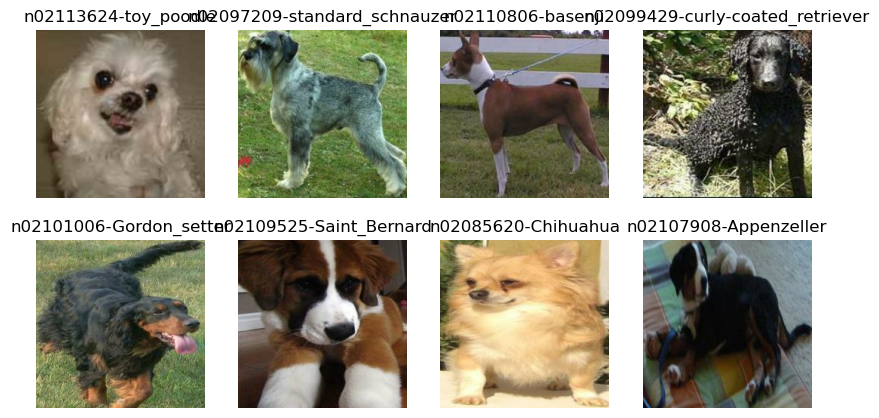

In [11]:
plt.figure(figsize=(10, 5))
for images, labels in training_ds.take(1):
  for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
num_classes = len(class_names)

model = keras.models.Sequential([
  keras.layers.Rescaling(1./255),
  keras.layers.RandomFlip("horizontal",
                      input_shape=(image_height,
                                  image_width,
                                  3)),
  keras.layers.RandomRotation(0.1),
  keras.layers.RandomZoom(0.1),
  keras.layers.Conv2D(128, 3, strides = (1,1), padding='valid', activation='relu', input_shape = (224, 224, 3)),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(512, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(512, 3, padding='same', activation='leaky_relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(4096, activation='relu'),
  keras.layers.Dense(num_classes)
])

In [13]:
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
epochs=30
history = model.fit(
  training_ds,
  validation_data=validation_ds,
  epochs=epochs
)
model.save('/kaggle/working/model17')

Epoch 1/30
150/150 [==============================] - 52s 244ms/step - loss: 4.7897 - accuracy: 0.0069 - val_loss: 4.7864 - val_accuracy: 0.0000e+00
Epoch 2/30
150/150 [==============================] - 28s 183ms/step - loss: 4.7889 - accuracy: 0.0082 - val_loss: 4.7894 - val_accuracy: 0.0000e+00
Epoch 3/30
150/150 [==============================] - 28s 183ms/step - loss: 4.7636 - accuracy: 0.0120 - val_loss: 4.5974 - val_accuracy: 0.0039
Epoch 4/30
150/150 [==============================] - 28s 185ms/step - loss: 4.5965 - accuracy: 0.0242 - val_loss: 4.6332 - val_accuracy: 0.0094
Epoch 5/30
150/150 [==============================] - 28s 182ms/step - loss: 4.3623 - accuracy: 0.0385 - val_loss: 4.5314 - val_accuracy: 0.0344
Epoch 6/30
150/150 [==============================] - 28s 183ms/step - loss: 4.1492 - accuracy: 0.0604 - val_loss: 3.9934 - val_accuracy: 0.0994
Epoch 7/30
150/150 [==============================] - 28s 182ms/step - loss: 4.0034 - accuracy: 0.0757 - val_loss: 3.9443 

[4.786404132843018, 4.789426326751709, 4.597440719604492, 4.633206844329834, 4.531407833099365, 3.993431329727173, 3.9442806243896484, 3.803149461746216, 3.4689807891845703, 3.2922348976135254, 3.3115522861480713, 2.945218086242676, 2.7785987854003906, 2.9036507606506348, 2.2338738441467285, 2.0963618755340576, 2.1502294540405273, 1.733489751815796, 2.1164441108703613, 1.6617405414581299, 1.4268783330917358, 1.4555772542953491, 1.518345832824707, 1.3480762243270874, 1.4218268394470215, 1.4871457815170288, 1.4582178592681885, 1.2622406482696533, 1.516446828842163, 1.2734649181365967]


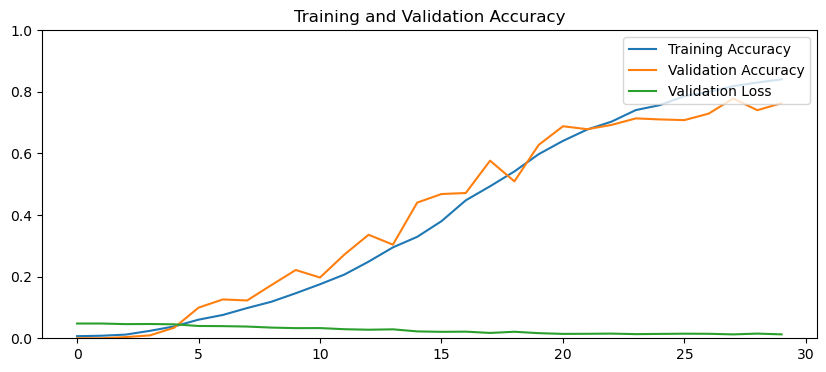

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.figure(figsize = (10,4))
plt.ylim([0,1])
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.plot(range(epochs), [l/100 for l in val_loss], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

print(val_loss)

In [16]:
model.save('/kaggle/working/model19')

In [17]:
predictions = model.predict(testing_ds)
print(predictions)
print(type(predictions))

135/135 [==============================] - 42s 310ms/step
[[ -97.964516 -111.90426  -108.72581  ...  -94.12792  -106.79232
  -110.99432 ]
 [ -75.04181   -76.731     -82.05088  ...  -71.31824   -73.58642
   -75.0979  ]
 [-107.48861  -105.033356 -104.729385 ... -105.2542   -113.33653
  -117.35363 ]
 ...
 [ -78.339935  -79.43215   -82.643715 ...  -79.82094   -76.94456
   -73.194534]
 [-141.00803  -139.20763  -137.57823  ... -144.50922  -138.50374
  -131.3387  ]
 [-165.3768   -169.62083  -168.91403  ... -164.77037  -160.87672
  -139.33632 ]]
<class 'numpy.ndarray'>


In [18]:
for _, labels in testing_ds:
    print(labels)

tf.Tensor(
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1], shape=(64,), dtype=int32)
tf.Tensor(
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(64,), dtype=int32)
tf.Tensor(
[1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2], shape=(64,), dtype=int32)
tf.Tensor(
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2], shape=(64,), dtype=int32)
tf.Tensor(
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3], shape=(64,), dtype=int32)
tf.Tensor(
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4], shape=(64,),

[[0.81458974 0.78151536 0.78905684 ... 0.8236927  0.7936443  0.78367436]
 [0.86897767 0.86496973 0.8523475  ... 0.87781245 0.8724308  0.86884457]
 [0.79199225 0.79781777 0.798539   ... 0.7972937  0.77811706 0.76858586]
 ...
 [0.86115235 0.85856086 0.85094094 ... 0.8576384  0.8644631  0.8733607 ]
 [0.7124619  0.7167336  0.7205996  ... 0.70415473 0.71840376 0.735404  ]
 [0.6546429  0.6445732  0.64625025 ... 0.65608174 0.6653201  0.7164283 ]]


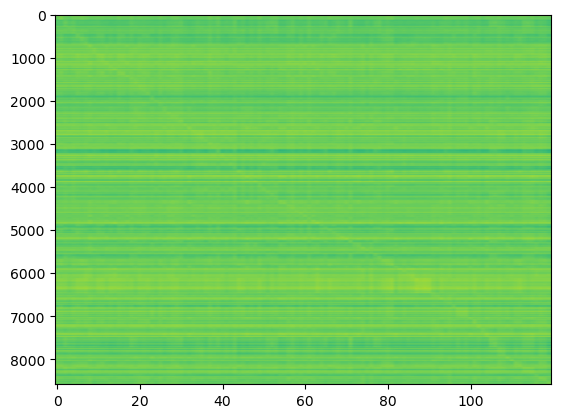

In [19]:
pred_norm = (predictions- np.min(predictions))/(np.max(predictions) - np.min(predictions))
print(pred_norm)
plt.cla()
plt.imshow(pred_norm, aspect = 'auto')

In [20]:
predictions.shape

(8580, 120)

In [21]:
testing_correct = np.concatenate([labels for _, labels in testing_ds])

In [22]:
print(testing_correct)


[  0   0   0 ... 119 119 119]


In [23]:
chihuahua_image_url = 'https://cdn.britannica.com/79/232779-050-6B0411D7/German-Shepherd-dog-Alsatian.jpg'
chihuahua_image_path = keras.utils.get_file(origin = chihuahua_image_url)

img = keras.utils.load_img(
    chihuahua_image_path, target_size=(image_height, image_width)
)

344524/344524 [==============================] - 0s 0us/step


1/1 [==============================] - 0s 236ms/step
This image most likely belongs to n02106662-German_shepherd with a 34.05 percent confidence.


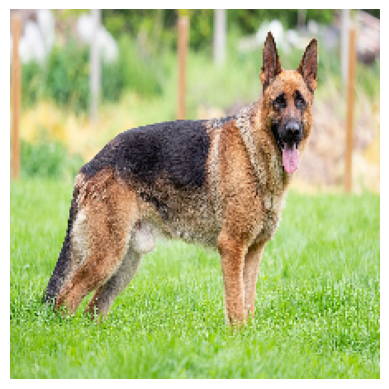

In [24]:
img_array1 = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array1, 0) # Create a batch

plt.axis(False)
plt.imshow(img_array1.astype(np.uint8))

prediction = model.predict(img_array)
# print(predictions[predictions > 0])
score = tf.nn.softmax(prediction[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [25]:
model = keras.models.load_model('/kaggle/working/model19')

In [26]:
import zipfile

def zipfolder(foldername, target_dir):
    zipobj = zipfile.ZipFile(foldername + '.zip', 'w', zipfile.ZIP_DEFLATED)
    rootlen = len(target_dir) + 1
    for base, dirs, files in os.walk(target_dir):
        for file in files:
            fn = os.path.join(base, file)
            zipobj.write(fn, fn[rootlen:])
            
zipfolder('model19', '/kaggle/working/model19')